In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt, rcParams
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import r2_score

In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [5]:
train_df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


Text(0.5, 1.0, 'Площадь кухни к цене')

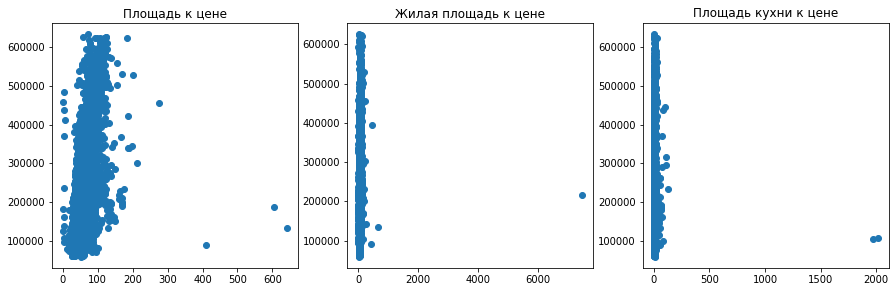

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=3)
fig.set_size_inches(15, 4.5)

ax[0].scatter(train_df['Square'], train_df['Price'])
ax[0].set_title('Площадь к цене')

ax[1].scatter(train_df['LifeSquare'], train_df['Price'])
ax[1].set_title('Жилая площадь к цене')

ax[2].scatter(train_df['KitchenSquare'], train_df['Price'])
ax[2].set_title('Площадь кухни к цене')

Text(0.5, 1.0, 'Общая площадь к площади кухни')

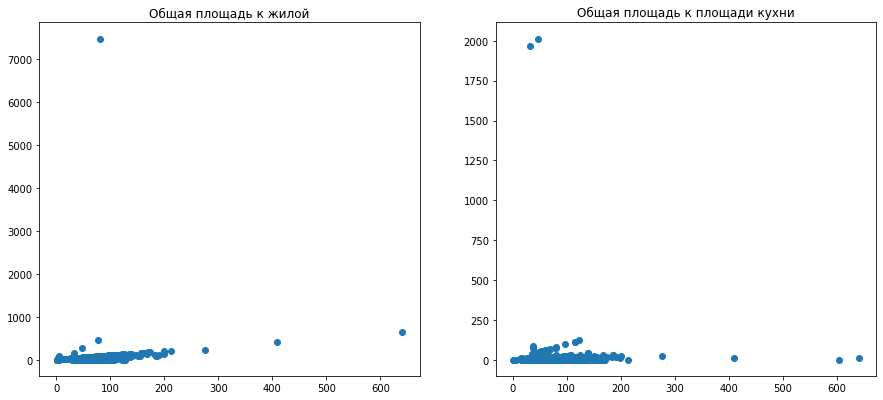

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(15, 6.5)

ax[0].scatter(train_df['Square'], train_df['LifeSquare'])
ax[0].set_title('Общая площадь к жилой')

ax[1].scatter(train_df['Square'], train_df['KitchenSquare'])
ax[1].set_title('Общая площадь к площади кухни')

Text(0.5, 1.0, 'Количество комнат к площади кухни')

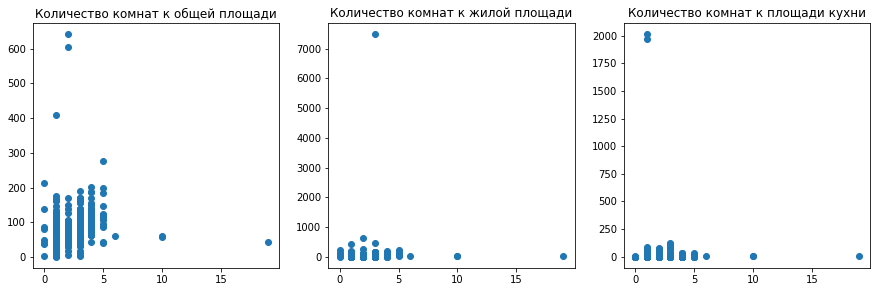

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=3)
fig.set_size_inches(15, 4.5)

ax[0].scatter(train_df['Rooms'], train_df['Square'])
ax[0].set_title('Количество комнат к общей площади')

ax[1].scatter(train_df['Rooms'], train_df['LifeSquare'])
ax[1].set_title('Количество комнат к жилой площади')

ax[2].scatter(train_df['Rooms'], train_df['KitchenSquare'])
ax[2].set_title('Количество комнат к площади кухни')

#### Присутствуют выбросы.

Обработка выбросов

In [9]:
def transform_square(df):
    square = df['Square']
    lifesquare = df['LifeSquare']
    kitchensquare = df['KitchenSquare']
    # слишком маленькие площади
    df.loc[square < 10, 'Square'] = (df[square < 10]['Square']) * 10
    df.loc[lifesquare < 10, 'LifeSquare'] = (df[lifesquare < 10]['LifeSquare']) * 10
    # слишком большие площади
    df.loc[square > 300, 'Square'] = (df[square > 300]['Square']) / 10
    df.loc[lifesquare > 300, 'LifeSquare'] = (df[lifesquare > 300]['LifeSquare']) / 10 
    # большая площадь кухни
    df.loc[(square < 100) & (kitchensquare > 20), 'KitchenSquare'] = (df[square < 100]['KitchenSquare']).median()
    df.loc[(square > 100) & (kitchensquare > 40), 'KitchenSquare'] = (df[square > 100]['KitchenSquare']).median()
    # при кол-ве комнат больше одной, квартира не может быть студией. Т.е. площадь кухни не может быть нулевой 
    df.loc[(kitchensquare < 1) & (df['Rooms'] > 1), 'KitchenSquare'] = kitchensquare.median()
    # наблюдения, где жилая площадь больше общей
    # жилая площадь меняется на 
    # произведение разности общей площади и площади кухни на медианное отношение 
    df.loc[lifesquare > square, 'LifeSquare'] = ((df[lifesquare > square]['Square'] 
                                                 - df[lifesquare > square]['KitchenSquare']) 
                                                 * (lifesquare/(square - kitchensquare)).median())
    return df


def transform_rooms(df): 
    # обработка выбросов по комнатам
    rooms = df['Rooms']
    df.loc[(rooms < 1) | (rooms > 5), 'Rooms'] = rooms.median()
    return df


def transform_floor(df):
    # обработка наблюдений, где этаж квартиры больше этажности дома
    floor = df['Floor']
    house_floor = df['HouseFloor']
    
    df.loc[floor > house_floor, 'HouseFloor'] = df[floor > house_floor]['Floor']
    return df


def fill_lifesquare(df):
    lifesquare = df['LifeSquare']
    rooms = df['Rooms']
    # медианные соотношения жилой площади к разности общей площади и площади кухни, в зависимости от кол-ва комнат
    rooms_rel = [((df[rooms == i]['LifeSquare']) 
                  / (df[rooms == i]['Square'] - df[rooms == i]['KitchenSquare'])).median() 
                 for i in range(1, 6)]
    
    for i, val in enumerate(rooms_rel):
        df.loc[lifesquare.isnull() & (rooms == i+1), 'LifeSquare'] = ((df[lifesquare.isnull() & (rooms == i+1)]['Square'] 
                                                                      - df[lifesquare.isnull() & (rooms == i+1)]['KitchenSquare']) 
                                                                      * val)
    return df


def replace_value(df):
    # приведение object к типу int без создания dummies columns
    df.replace({'Ecology_2': {'A': 1, 'B': 0}, 
                'Ecology_3': {'A': 1, 'B': 0}, 
                'Shops_2': {'A': 1, 'B': 0}}, 
               inplace=True)
    return df


#### Работа с тренировочным датасетом

In [10]:
transform_square(train_df)
transform_rooms(train_df)
transform_floor(train_df)
fill_lifesquare(train_df)
replace_value(train_df)

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     10000 non-null  float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  int64  
 11  Ecology_3      10000 non-null  int64  
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

#### Работа с тестовым датасетом

In [11]:
transform_square(test_df)
transform_rooms(test_df)
transform_floor(test_df)
fill_lifesquare(test_df)
replace_value(test_df)

test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   int64  
 1   DistrictId     5000 non-null   int64  
 2   Rooms          5000 non-null   float64
 3   Square         5000 non-null   float64
 4   LifeSquare     5000 non-null   float64
 5   KitchenSquare  5000 non-null   float64
 6   Floor          5000 non-null   int64  
 7   HouseFloor     5000 non-null   float64
 8   HouseYear      5000 non-null   int64  
 9   Ecology_1      5000 non-null   float64
 10  Ecology_2      5000 non-null   int64  
 11  Ecology_3      5000 non-null   int64  
 12  Social_1       5000 non-null   int64  
 13  Social_2       5000 non-null   int64  
 14  Social_3       5000 non-null   int64  
 15  Healthcare_1   2623 non-null   float64
 16  Helthcare_2    5000 non-null   int64  
 17  Shops_1        5000 non-null   int64  
 18  Shops_2 

### Заполнение Healthcare_1
Обучение модели и заполнение пропущенных значений

In [12]:
train_df['Healthcare_1'].value_counts()

540.0     511
30.0      348
1046.0    245
750.0     163
229.0     148
         ... 
370.0      14
32.0       12
1815.0     10
35.0        2
0.0         1
Name: Healthcare_1, Length: 79, dtype: int64

In [13]:
test_df['Healthcare_1'].value_counts()

540.0     257
30.0      163
1046.0    120
2300.0     78
240.0      73
         ... 
200.0       7
32.0        7
920.0       4
35.0        2
0.0         1
Name: Healthcare_1, Length: 79, dtype: int64

Количество значений фиксировано, поэтому будет использована классификация

In [14]:
def fit_healthcare(df1, df2):
    # обучение модели на двух датасетах, для лучшего прогнозирования
    train = pd.concat([
        df1[df1['Healthcare_1'].notnull()][['DistrictId', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1', 'Helthcare_2']], 
        df2[df2['Healthcare_1'].notnull()][['DistrictId', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1', 'Helthcare_2']]
    ], axis=0)
    
    model = RandomForestClassifier(max_depth=15)
    model.fit(train.drop('Healthcare_1', axis=1), train['Healthcare_1'])
    return model


def fill_healthcare(model, df):
    test = df[df['Healthcare_1'].isnull()][['DistrictId', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1', 'Helthcare_2']]
    df.loc[df['Healthcare_1'].isnull(), 'Healthcare_1'] = model.predict(test.drop('Healthcare_1', axis=1))
    return df

In [15]:
model = fit_healthcare(train_df, test_df)

fill_healthcare(model, train_df)
fill_healthcare(model, test_df)

test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   int64  
 1   DistrictId     5000 non-null   int64  
 2   Rooms          5000 non-null   float64
 3   Square         5000 non-null   float64
 4   LifeSquare     5000 non-null   float64
 5   KitchenSquare  5000 non-null   float64
 6   Floor          5000 non-null   int64  
 7   HouseFloor     5000 non-null   float64
 8   HouseYear      5000 non-null   int64  
 9   Ecology_1      5000 non-null   float64
 10  Ecology_2      5000 non-null   int64  
 11  Ecology_3      5000 non-null   int64  
 12  Social_1       5000 non-null   int64  
 13  Social_2       5000 non-null   int64  
 14  Social_3       5000 non-null   int64  
 15  Healthcare_1   5000 non-null   float64
 16  Helthcare_2    5000 non-null   int64  
 17  Shops_1        5000 non-null   int64  
 18  Shops_2 

Добавление дополнительного признака - средняя цена за кв м по району

In [27]:
districts = pd.DataFrame({'count': train_df['DistrictId'].value_counts()}).reset_index()

# Районы, которые часто встречаются. Средняя цена в редких районах не будет учитываться
# Для уменьшения влияния выбросов, если таковые присутствуют
districts = districts[districts['count'] > 30]

train_df['price_square'] = np.nan

train_df.loc[train_df['DistrictId'].isin(districts['index']), 'price_square'] = train_df['Price'] / train_df['Square']

# датафрейм, в котором содержится Id района и средняя цена по району
mean_price = train_df[['DistrictId','price_square']].groupby('DistrictId')[['price_square']].mean().reset_index()

# сразу дропаем цену за кв метр в тренировочном датафрейме
train_df = train_df.drop('price_square', axis=1)

In [28]:
mean_price.head()

,DistrictId,price_square
0,0,3710.401014
1,1,3234.516079
2,2,4560.204511
3,3,3783.790553
4,4,NaN


In [29]:
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,0,0,33,7976,5,990.0,0,11,0,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,0,0,46,10309,1,240.0,1,16,0,300009.450063
2,4765,53,2.0,44.947953,29.197612,6.0,8,12.0,1968,0.049637,0,0,34,7759,0,229.0,1,3,0,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,0,0,23,5735,3,1084.0,0,5,0,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,0,0,35,5776,1,2078.0,2,4,0,150226.531644


Дополнительные датафреймы для обучения с использованием дополнительного признака (средняя цена по району)

In [30]:
train = pd.merge(train_df, mean_price, on='DistrictId', how='left')
test = pd.merge(test_df, mean_price, on='DistrictId', how='left')

### Тепловая карта

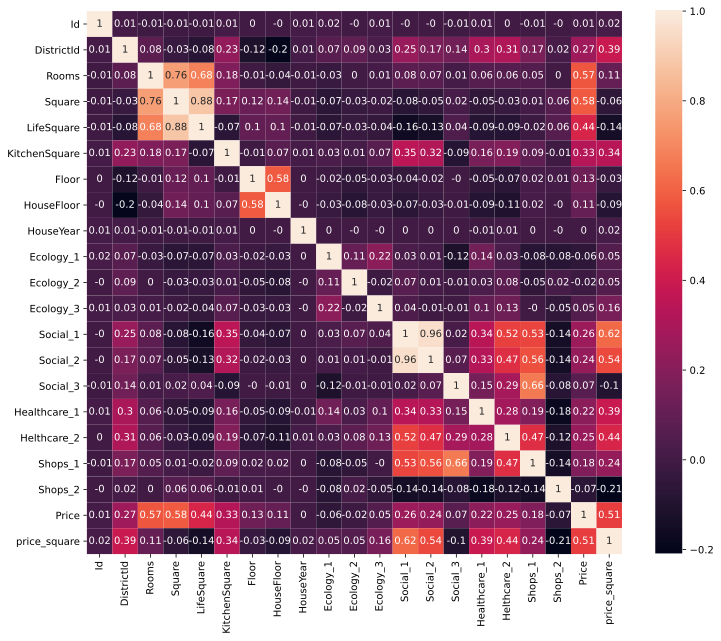

In [16]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
rcParams['figure.figsize'] = 12, 10
sns.heatmap(train.corr().round(2), annot=True)

### Базовая модель. 
Без использования дополнительного признака

In [31]:
X = train_df.drop(['Id', 'Price'], axis=1)

y = train_df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
rfr = RandomForestRegressor(n_estimators=400, max_depth=19, max_features=5, random_state=0, n_jobs=-1)

rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)

r2_score(y_test, y_pred)

0.7037090112917752

### Модель с использованием дополнительного признака

In [32]:
X = train[train['price_square'].notnull()].drop(['Id', 'Price'], axis=1)
X1 = train[train['price_square'].isnull()].drop(['Id', 'DistrictId', 'Price', 'price_square'], axis=1)

y = train[train['price_square'].notnull()]['Price']
y1 = train[train['price_square'].isnull()]['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.33, random_state=0)
# Первая модель обучается на данных с заполненным доп признаком (часто встречающиеся районы)
rfr = RandomForestRegressor(n_estimators=400, max_depth=19, max_features=5, random_state=0, n_jobs=-1)
# Вторая на данных, в которых  не заполнен доп признак (редкие районы)
rfr1 = RandomForestRegressor(n_estimators=400, max_depth=19, max_features=5, random_state=0, n_jobs=-1)

rfr.fit(X_train, y_train)
rfr1.fit(X1_train, y1_train)

y_pred = rfr.predict(X_test)
y_pred1 = rfr1.predict(X1_test)

y_test_all = np.hstack([y_test, y1_test])
y_pred_all = np.hstack([y_pred, y_pred1])

r2_score(y_test_all, y_pred_all)

0.7493749985479854

Локально результат значительно улучшился!

### Предсказывание целевой переменной на тестовом датафрейме

In [33]:
X_train = train[train['price_square'].notnull()].drop(['Id', 'Social_3', 'LifeSquare', 'Price'], axis=1)
X_train_nan = train[train['price_square'].isnull()].drop(['Id', 'DistrictId', 'Price', 'price_square'], axis=1)

y_train = train[train['price_square'].notnull()]['Price']
y_train_nan = train[train['price_square'].isnull()]['Price']

X_test = test[test['price_square'].notnull()].drop(['Id', 'Social_3', 'LifeSquare'], axis=1)
X_test_nan = test[test['price_square'].isnull()].drop(['Id', 'DistrictId', 'price_square'], axis=1)

model = RandomForestRegressor(n_estimators=400, max_depth=19, max_features=5, random_state=0, n_jobs=-1)
model_nan = RandomForestRegressor(n_estimators=400, max_depth=19, max_features=5, random_state=0, n_jobs=-1)

model.fit(X_train, y_train)
model_nan.fit(X_train_nan, y_train_nan)

y_pred = model.predict(X_test)
y_pred_nan = model_nan.predict(X_test_nan)

Добавление и заполнение целевой переменной в тестовом датафрейме

In [35]:
test['Price'] = np.nan

test.loc[test['price_square'].notnull(), 'Price'] = y_pred
test.loc[test['price_square'].isnull(), 'Price'] = y_pred_nan

Сохранение предикта

In [36]:
test[['Id', 'Price']].to_csv('final_predict.csv', index=False)